In [7]:
from importlib import reload
from scipy.stats import boxcox
from dfprepare import norm_data

import QRR
reload(QRR)
from QRR import *

import Task_3.LRR as LRR
reload(LRR)
from Task_3.LRR import *

,Price,Mileage,Liter,Cruise,Sound,Leather
0,17314.103129,8221,3.1,1,1,1
1,17542.036083,9135,3.1,1,1,0
2,16218.847862,13196,3.1,1,1,0
3,16336.913140,16342,3.1,1,0,0
4,16339.170324,19832,3.1,1,0,1
...,...,...,...,...,...,...
799,16507.070267,16229,3.0,1,0,0
800,16175.957604,19095,3.0,1,1,0
801,15731.132897,20484,3.0,1,1,0
802,15118.893228,25979,3.0,1,1,0


,Price,Mileage,Liter,Cruise,Sound,Leather
0,0.139660,0.158716,0.340909,1,1,1
1,0.143329,0.176952,0.340909,1,1,0
2,0.122027,0.257976,0.340909,1,1,0
3,0.123928,0.320744,0.340909,1,0,0
4,0.123964,0.390375,0.340909,1,0,1
...,...,...,...,...,...,...
799,0.126667,0.318489,0.318182,1,0,0
800,0.121337,0.375671,0.318182,1,1,0
801,0.114176,0.403384,0.318182,1,1,0
802,0.104319,0.513018,0.318182,1,1,0


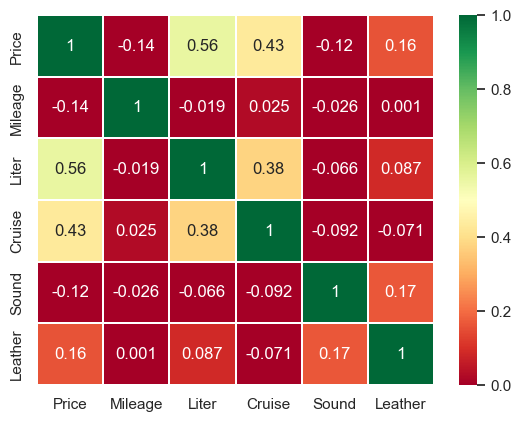

In [8]:
# Read dataframe
data = pd.read_excel('kuiper.xls')
data.dropna(inplace=True)
data = data[["Price", "Mileage", "Liter", "Cruise", "Sound", "Leather"]]
display(data)

# Normalization
data = norm_data(data)
display(data)

# Correlation
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

# Dependent variable
explore_column = 'Price' 

### Квантильная регрессия

                             Price
Model:              QuantReg         Pseudo R-squared:   0.269 
Dependent Variable: Price            AIC:                nan   
Date:               2023-12-06 03:34 BIC:                nan   
No. Observations:   804              Log-Likelihood:     nan   
Df Model:           5                F-statistic:        nan   
Df Residuals:       798              Prob (F-statistic): nan   
R-squared:          nan              Scale:              1.0000
Adj. R-squared:     nan                                        
----------------------------------------------------------------
             Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
----------------------------------------------------------------
const        0.0807    0.0104   7.7388  0.0000   0.0602   0.1012
Mileage     -0.0992    0.0165  -6.0088  0.0000  -0.1316  -0.0668
Liter        0.3105    0.0117  26.5438  0.0000   0.2875   0.3335
Cruise       0.0219    0.0068   3.2227  0.0013   0.0086   0.035

,Variable,VIF,Tolerance
0,const,14.982602,0.066744
1,Mileage,1.002294,0.997711
2,Liter,1.188982,0.841056
3,Cruise,1.185921,0.843227
4,Sound,1.038791,0.962658
5,Leather,1.049419,0.952908


,const,Mileage,Liter,Cruise,Sound,Leather,F-statistic,Prob (F-statistic),df_denom,df_num
0,1.0,0.0,0.0,0.0,0.0,0.0,59.889767,3.0330323448367625e-14,798.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,36.105116,2.84068052325667e-09,798.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,704.574155,9.042078643423624e-112,798.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,10.385812,0.0013214281014824573,798.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,23.213996,1.7347556457908681e-06,798.0,1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,7.579780,0.006036794211418249,798.0,1.0
6,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",708.813834,1.025206837e-315,798.0,6.0


D:\PythonEnv\Matt\lib\site-packages\statsmodels\regression\quantile_regression.py:206: RuntimeWarning: divide by zero encountered in scalar divide
  d = np.where(e > 0, (q/fhat0)**2, ((1-q)/fhat0)**2)
D:\PythonEnv\Matt\lib\site-packages\statsmodels\regression\quantile_regression.py:208: RuntimeWarning: invalid value encountered in multiply
  xtdx = np.dot(exog.T * d[np.newaxis, :], exog)
D:\PythonEnv\Matt\lib\site-packages\statsmodels\regression\quantile_regression.py:219: RuntimeWarning: divide by zero encountered in scalar divide
  lfit.sparsity = 1. / fhat0
D:\PythonEnv\Matt\lib\site-packages\statsmodels\regression\quantile_regression.py:206: RuntimeWarning: divide by zero encountered in scalar divide
  d = np.where(e > 0, (q/fhat0)**2, ((1-q)/fhat0)**2)
D:\PythonEnv\Matt\lib\site-packages\statsmodels\regression\quantile_regression.py:208: RuntimeWarning: invalid value encountered in multiply
  xtdx = np.dot(exog.T * d[np.newaxis, :], exog)
D:\PythonEnv\Matt\lib\site-packages\statsm

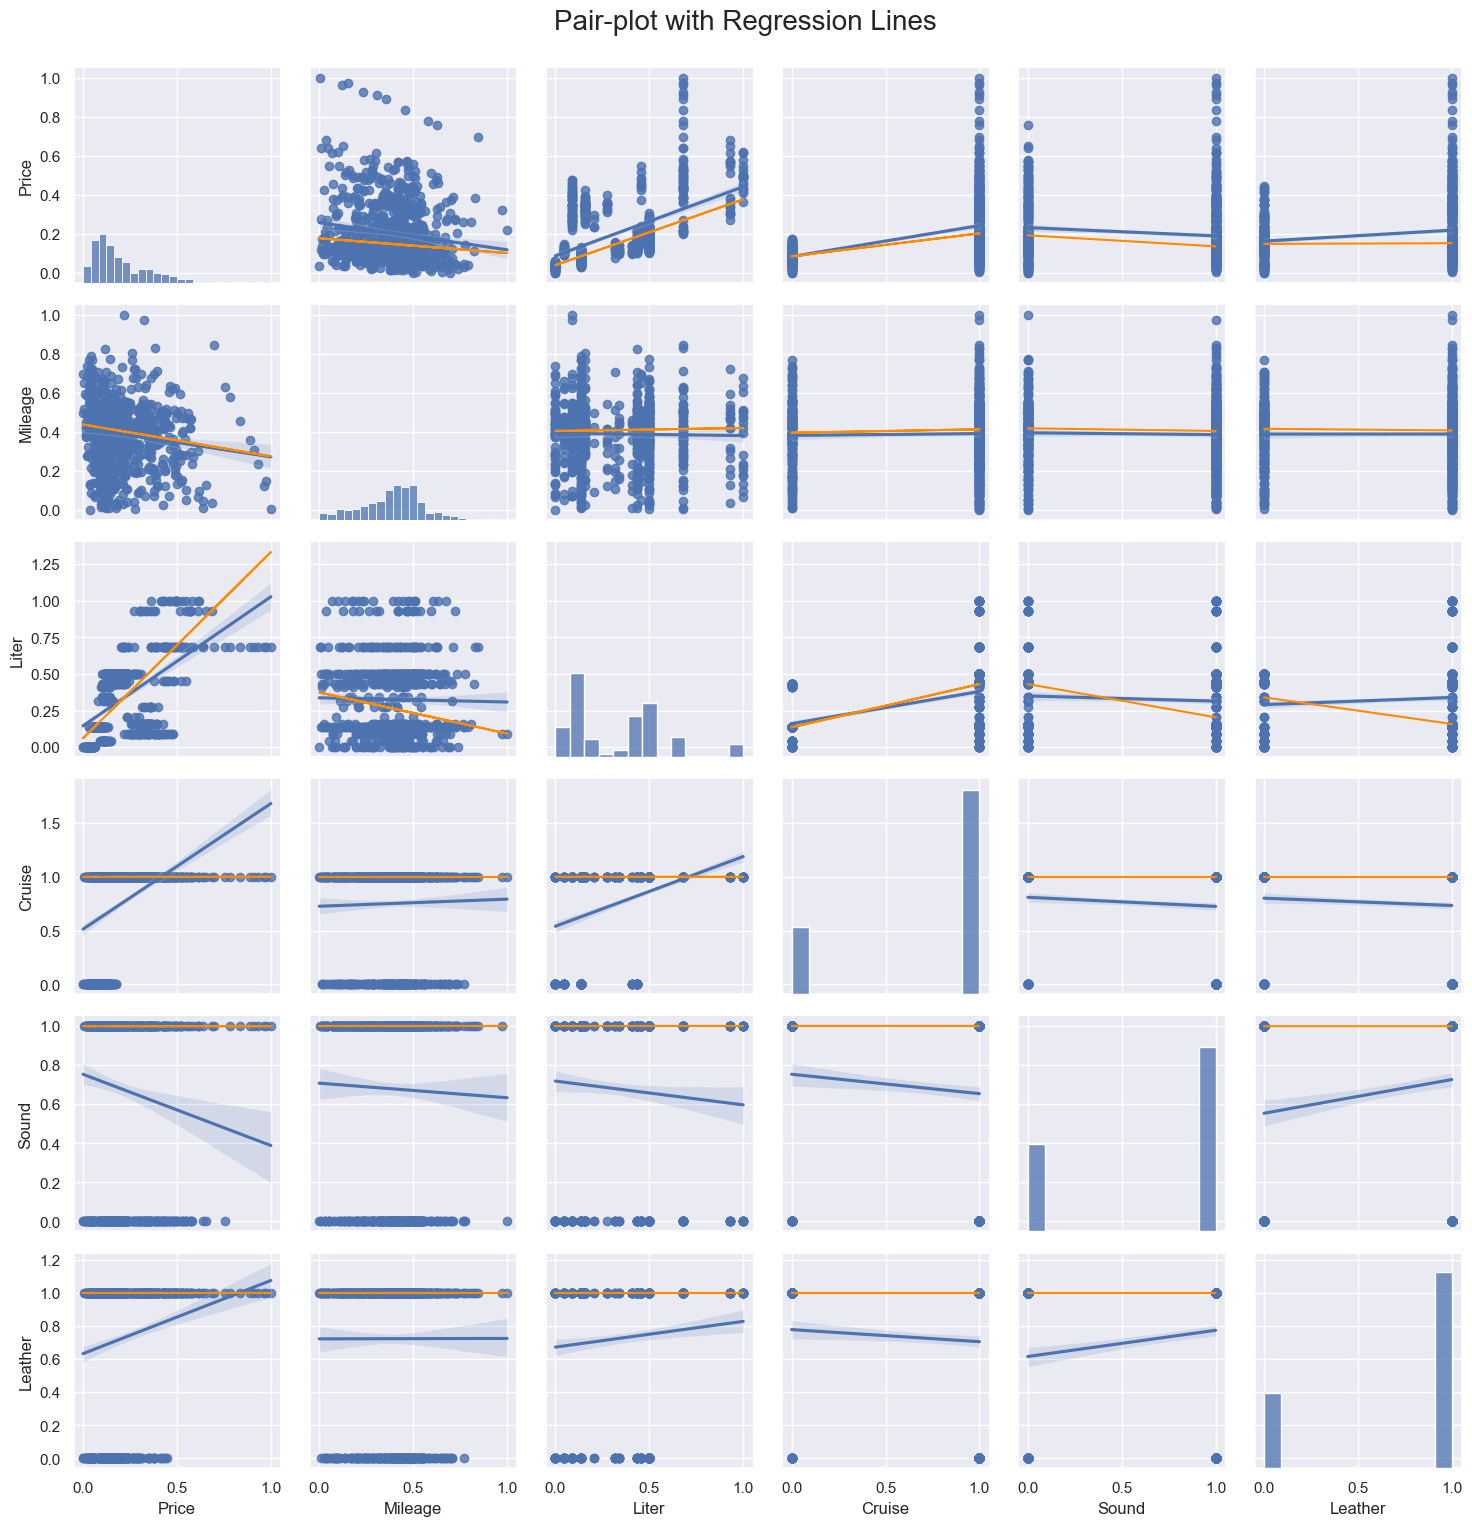

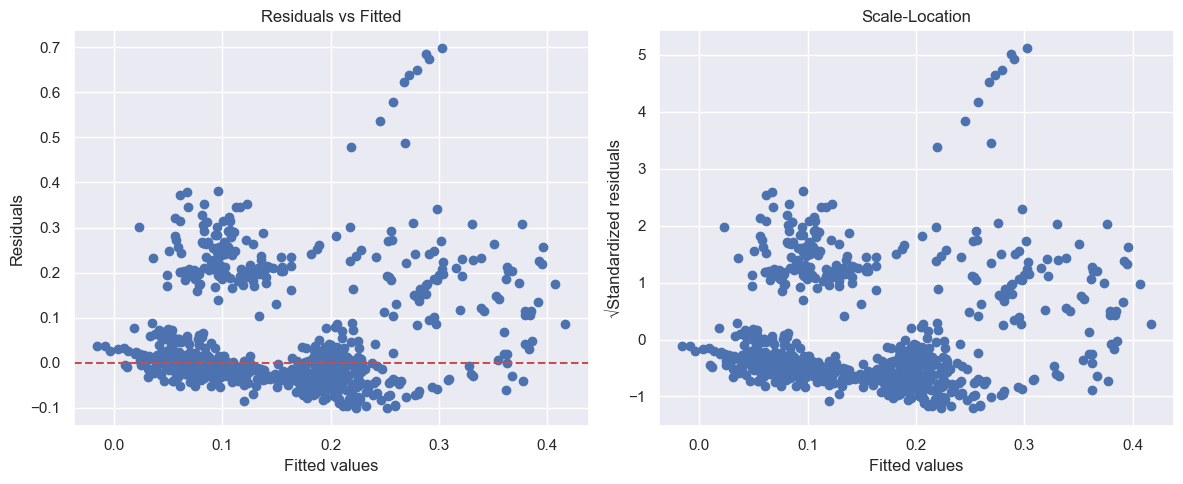

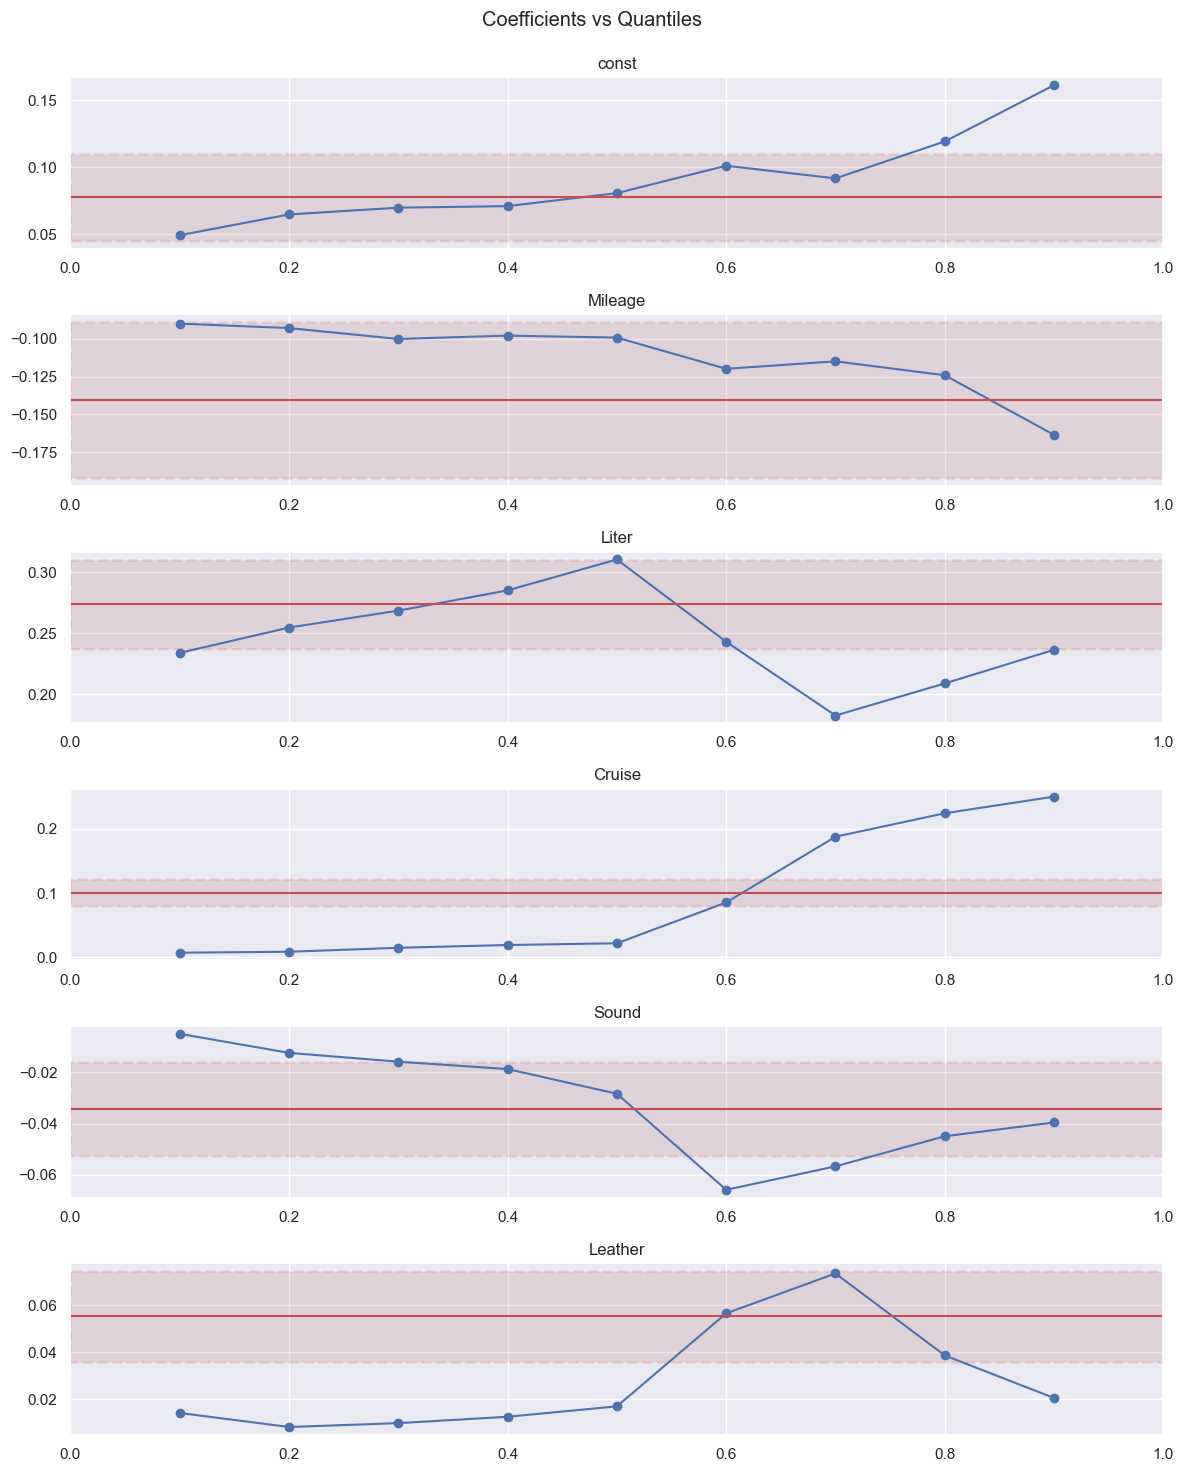

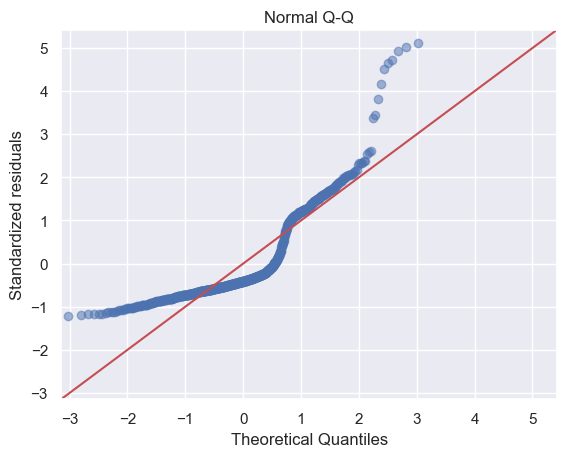

                                STEPS AIC                              
Selected Features: ['Mileage', 'Liter', 'Cruise', 'Sound', 'Leather']
AIC: nan


In [9]:
base_research = QuantRegressionResearch(y=data[explore_column], x=data.drop(columns=explore_column))
base_research.info()
base_research.draw_plots()
quant_data = base_research.stepwise_selection(criteria='AIC')

In [10]:
display(quant_data)

,Price,Mileage,Liter,Cruise,Sound,Leather
0,0.139660,0.158716,0.340909,1.0,1.0,1.0
1,0.143329,0.176952,0.340909,1.0,1.0,0.0
2,0.122027,0.257976,0.340909,1.0,1.0,0.0
3,0.123928,0.320744,0.340909,1.0,0.0,0.0
4,0.123964,0.390375,0.340909,1.0,0.0,1.0
...,...,...,...,...,...,...
799,0.126667,0.318489,0.318182,1.0,0.0,0.0
800,0.121337,0.375671,0.318182,1.0,1.0,0.0
801,0.114176,0.403384,0.318182,1.0,1.0,0.0
802,0.104319,0.513018,0.318182,1.0,1.0,0.0


In [11]:
# Применяем преобразование Бокса-Кокса к зависимой переменной
y_transformed, _ = boxcox(data[explore_column] + 1e-6)  # + 1 чтобы не было 0-значений
quant_data_t = quant_data.copy()
quant_data_t[explore_column] = y_transformed
display(quant_data_t)

,Price,Mileage,Liter,Cruise,Sound,Leather
0,-1.536836,0.158716,0.340909,1.0,1.0,1.0
1,-1.521324,0.176952,0.340909,1.0,1.0,0.0
2,-1.615873,0.257976,0.340909,1.0,1.0,0.0
3,-1.606964,0.320744,0.340909,1.0,0.0,0.0
4,-1.606794,0.390375,0.340909,1.0,0.0,1.0
...,...,...,...,...,...,...
799,-1.594298,0.318489,0.318182,1.0,0.0,0.0
800,-1.619136,0.375671,0.318182,1.0,1.0,0.0
801,-1.653802,0.403384,0.318182,1.0,1.0,0.0
802,-1.704239,0.513018,0.318182,1.0,1.0,0.0


                             Price
Model:              QuantReg         Pseudo R-squared:   0.334 
Dependent Variable: Price            AIC:                nan   
Date:               2023-12-06 03:34 BIC:                nan   
No. Observations:   804              Log-Likelihood:     nan   
Df Model:           5                F-statistic:        nan   
Df Residuals:       798              Prob (F-statistic): nan   
R-squared:          nan              Scale:              1.0000
Adj. R-squared:     nan                                        
----------------------------------------------------------------
            Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
----------------------------------------------------------------
const      -1.8570    0.0401  -46.3322  0.0000  -1.9357  -1.7783
Mileage    -0.5400    0.0634   -8.5128  0.0000  -0.6645  -0.4155
Liter       1.2431    0.0450   27.6475  0.0000   1.1549   1.3314
Cruise      0.1575    0.0261    6.0268  0.0000   0.1062   0.208

,Variable,VIF,Tolerance
0,const,14.982602,0.066744
1,Mileage,1.002294,0.997711
2,Liter,1.188982,0.841056
3,Cruise,1.185921,0.843227
4,Sound,1.038791,0.962658
5,Leather,1.049419,0.952908


,const,Mileage,Liter,Cruise,Sound,Leather,F-statistic,Prob (F-statistic),df_denom,df_num
0,1.0,0.0,0.0,0.0,0.0,0.0,2146.668455,1.8744125258229977e-228,798.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,72.466925,8.371814041594425e-17,798.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,764.384292,1.5250062233977423e-118,798.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,36.322626,2.5530361317885916e-09,798.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,15.126668,0.00010890374481607584,798.0,1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,10.950797,0.0009775910749948579,798.0,1.0
6,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",3921.869487,0.0,798.0,6.0


D:\PythonEnv\Matt\lib\site-packages\statsmodels\regression\quantile_regression.py:206: RuntimeWarning: divide by zero encountered in scalar divide
  d = np.where(e > 0, (q/fhat0)**2, ((1-q)/fhat0)**2)
D:\PythonEnv\Matt\lib\site-packages\statsmodels\regression\quantile_regression.py:208: RuntimeWarning: invalid value encountered in multiply
  xtdx = np.dot(exog.T * d[np.newaxis, :], exog)
D:\PythonEnv\Matt\lib\site-packages\statsmodels\regression\quantile_regression.py:219: RuntimeWarning: divide by zero encountered in scalar divide
  lfit.sparsity = 1. / fhat0
D:\PythonEnv\Matt\lib\site-packages\statsmodels\regression\quantile_regression.py:206: RuntimeWarning: divide by zero encountered in scalar divide
  d = np.where(e > 0, (q/fhat0)**2, ((1-q)/fhat0)**2)
D:\PythonEnv\Matt\lib\site-packages\statsmodels\regression\quantile_regression.py:208: RuntimeWarning: invalid value encountered in multiply
  xtdx = np.dot(exog.T * d[np.newaxis, :], exog)
D:\PythonEnv\Matt\lib\site-packages\statsm

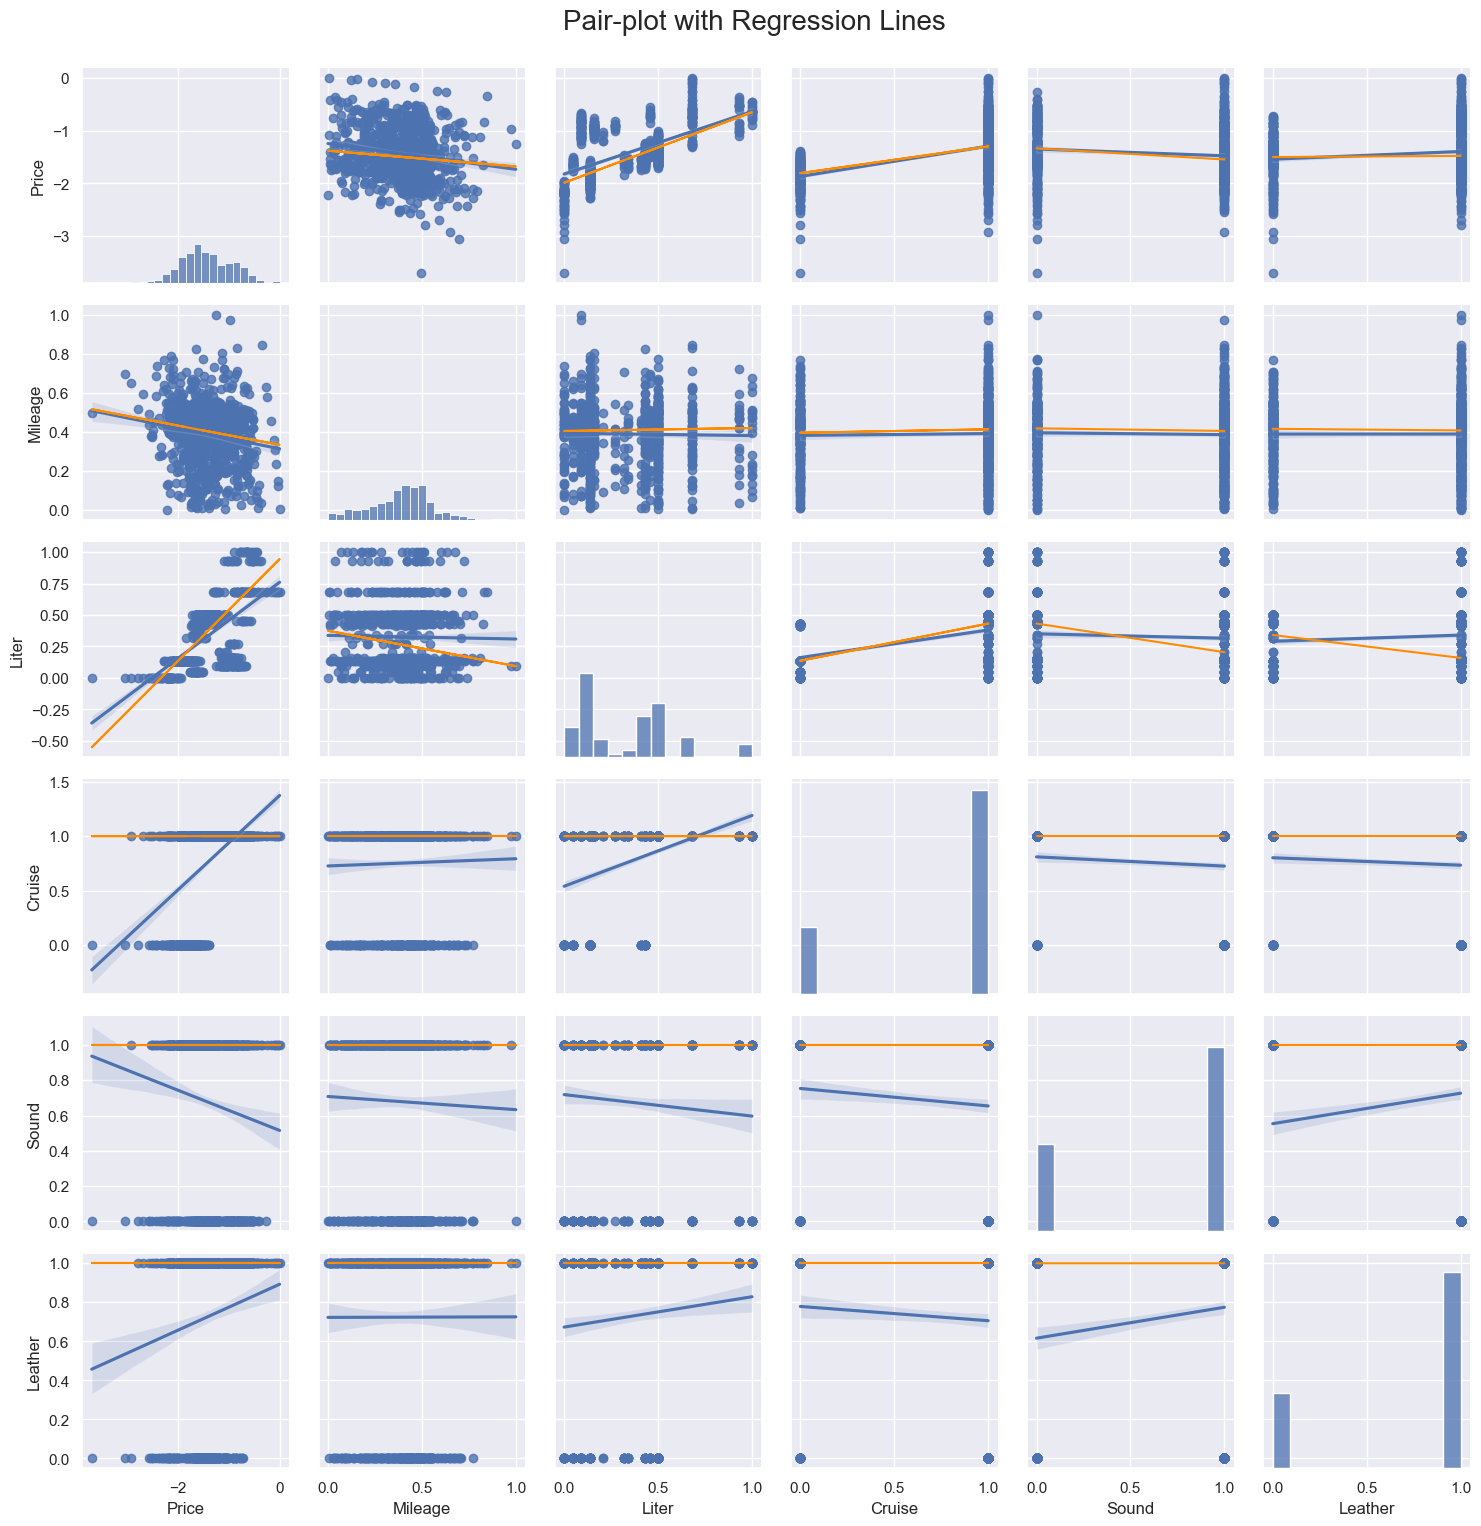

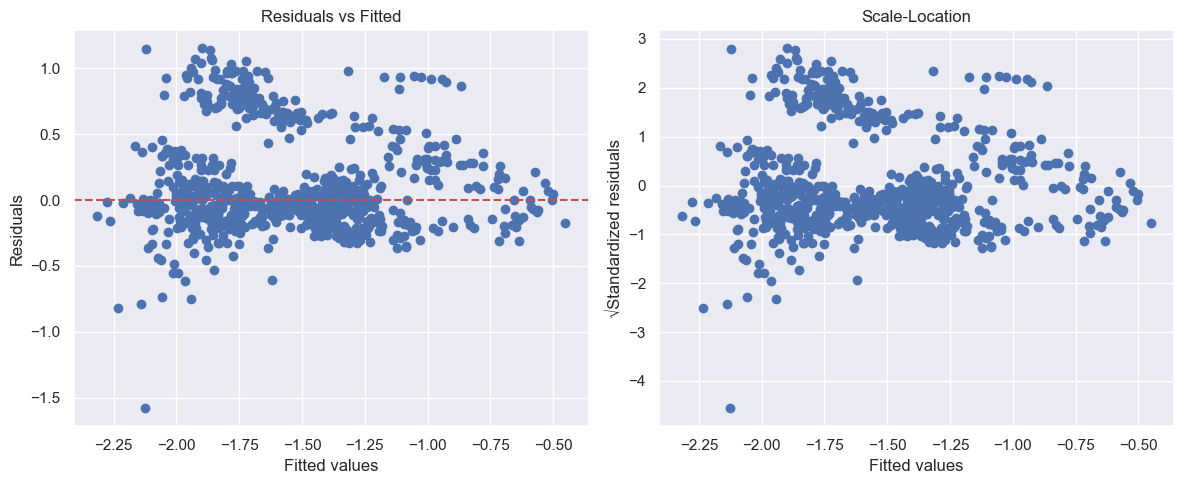

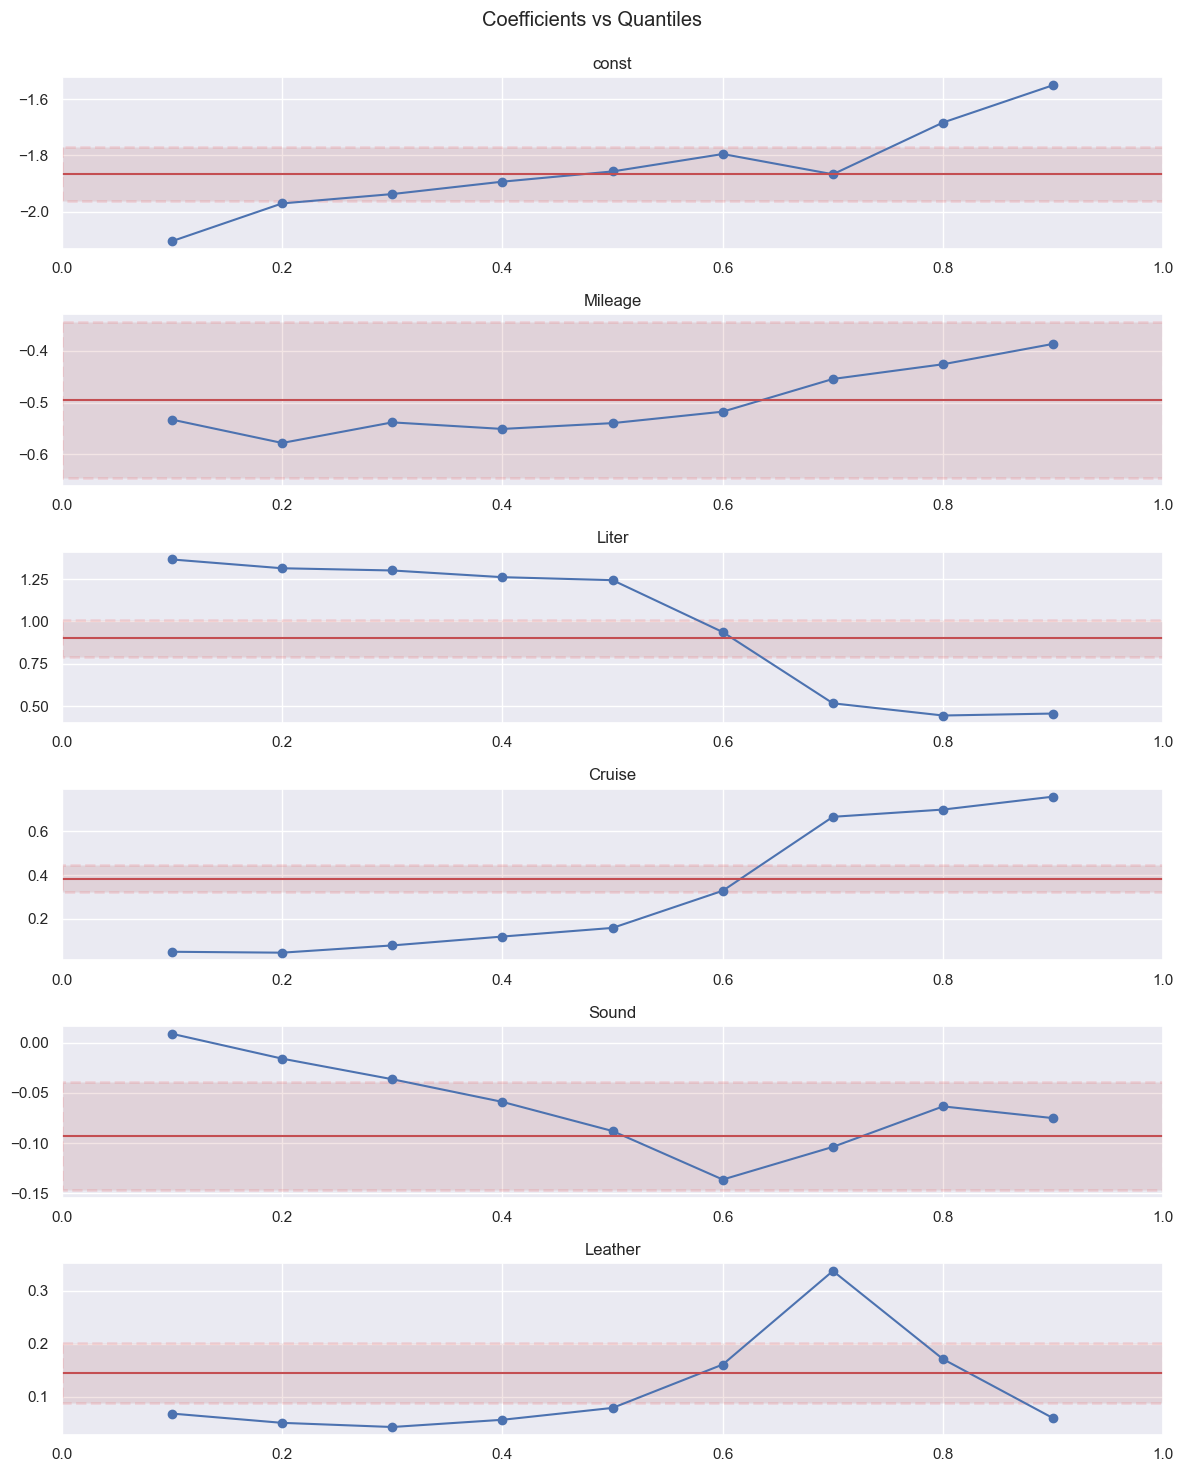

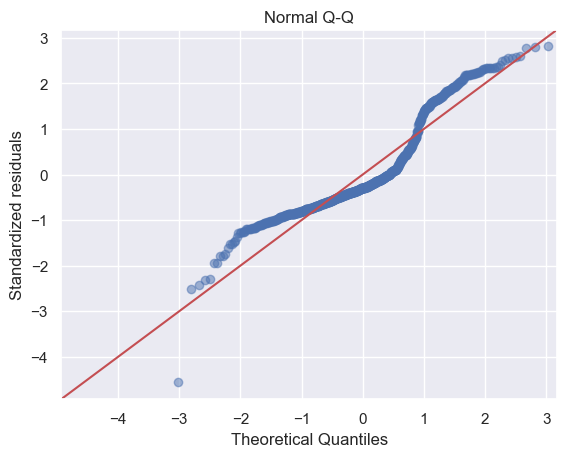

In [12]:
# Проводим анализ заново
enhanced_research = QuantRegressionResearch(y=quant_data_t[explore_column], 
                                             x=quant_data_t.drop(columns=explore_column))
enhanced_research.info()
enhanced_research.draw_plots()

### Линейная регрессия

                                    Price                                     
Dep. Variable:                  Price   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     113.9
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           7.24e-91
Time:                        03:34:36   Log-Likelihood:                 554.00
No. Observations:                 804   AIC:                            -1096.
Df Residuals:                     798   BIC:                            -1068.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0775      0.017      4.658      0.0

,Variable,VIF,Tolerance
0,const,14.982602,0.066744
1,Mileage,1.002294,0.997711
2,Liter,1.188982,0.841056
3,Cruise,1.185921,0.843227
4,Sound,1.038791,0.962658
5,Leather,1.049419,0.952908


,const,Mileage,Liter,Cruise,Sound,Leather,F-statistic,Prob (F-statistic),df_denom,df_num
0,1.0,0.0,0.0,0.0,0.0,0.0,21.693269,3.7466811552449814e-06,798.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,28.536165,1.2005074798826127e-07,798.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,214.863491,2.950129501086625e-43,798.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,85.991684,1.6528314878348436e-19,798.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,13.293553,0.00028358834171076866,798.0,1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,31.509547,2.7391085236977297e-08,798.0,1.0
6,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",471.912878,1.6236401064494636e-258,798.0,6.0


,dfb_const,dfb_Mileage,dfb_Liter,dfb_Cruise,dfb_Sound,dfb_Leather,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.014796,0.054157,0.010141,-0.028494,-0.022588,-0.022305,0.001024,-1.073540,0.005305,-0.078399,-1.073643,-0.078407
1,-0.023056,0.025944,-0.000727,-0.010327,-0.019665,0.034295,0.000440,-0.568247,0.008112,-0.051390,-0.568006,-0.051369
2,-0.019278,0.018228,-0.001199,-0.011409,-0.022760,0.039291,0.000483,-0.649342,0.006826,-0.053834,-0.649107,-0.053814
3,-0.042325,0.013917,0.001664,-0.010947,0.035249,0.040332,0.000804,-0.842682,0.006743,-0.069434,-0.842529,-0.069422
4,-0.014197,0.002801,0.014697,-0.025212,0.066702,-0.040171,0.001305,-1.215998,0.005268,-0.088489,-1.216363,-0.088516
...,...,...,...,...,...,...,...,...,...,...,...,...
799,-0.039426,0.013206,0.004230,-0.011067,0.032432,0.036570,0.000678,-0.771577,0.006786,-0.063775,-0.771381,-0.063759
800,-0.006765,0.001251,0.000383,-0.008430,-0.016598,0.028180,0.000221,-0.467350,0.006043,-0.036441,-0.467121,-0.036423
801,-0.005318,-0.001643,0.000309,-0.008814,-0.017629,0.029831,0.000248,-0.494177,0.006047,-0.038545,-0.493943,-0.038527
802,0.001762,-0.012146,-0.000064,-0.007643,-0.016287,0.027198,0.000228,-0.448503,0.006765,-0.037015,-0.448279,-0.036997


,student_resid,unadj_p,bonferroni(p)
0,-1.073643,0.283308,1.0
1,-0.568006,0.570191,1.0
2,-0.649107,0.516456,1.0
3,-0.842529,0.399745,1.0
4,-1.216363,0.224207,1.0
...,...,...,...
799,-0.771381,0.440710,1.0
800,-0.467121,0.640541,1.0
801,-0.493943,0.621482,1.0
802,-0.448279,0.654074,1.0


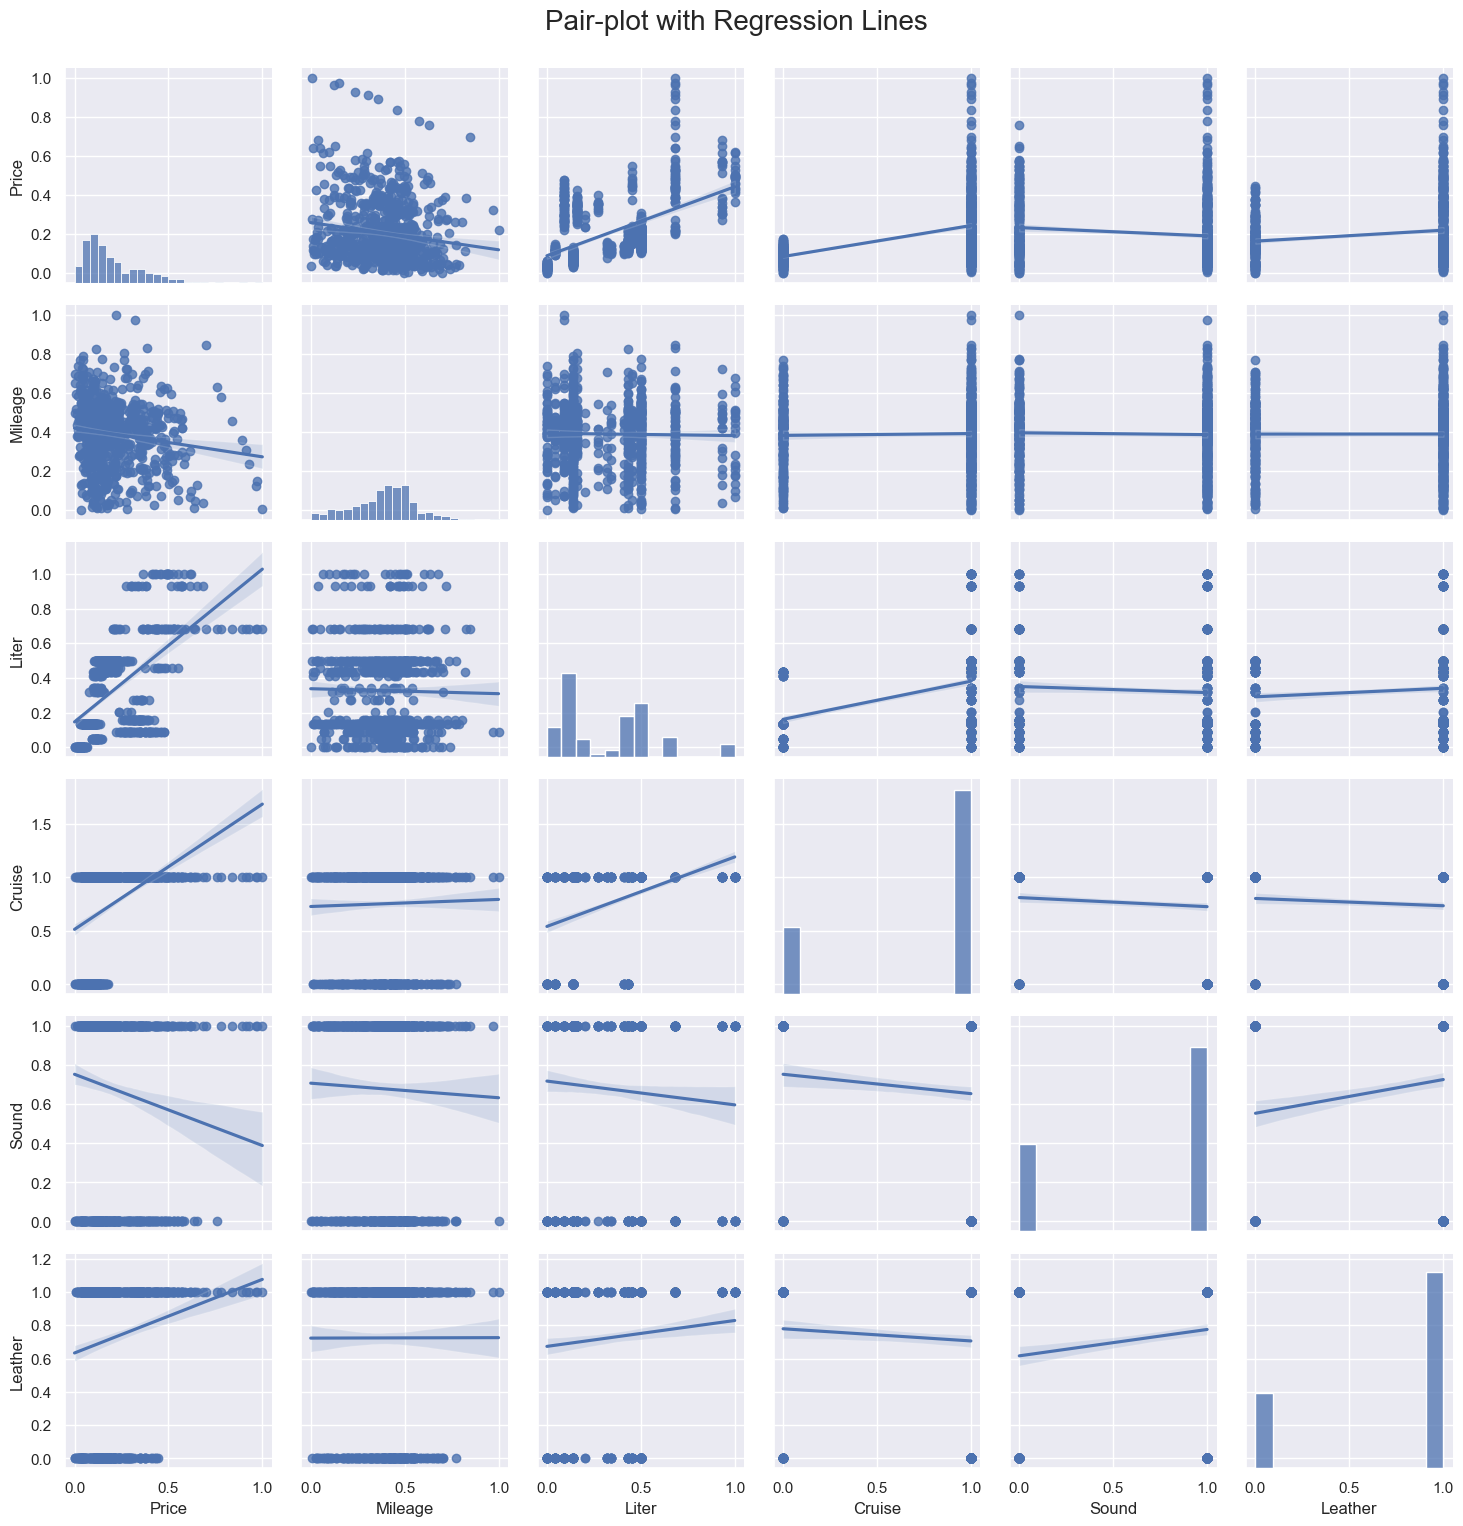

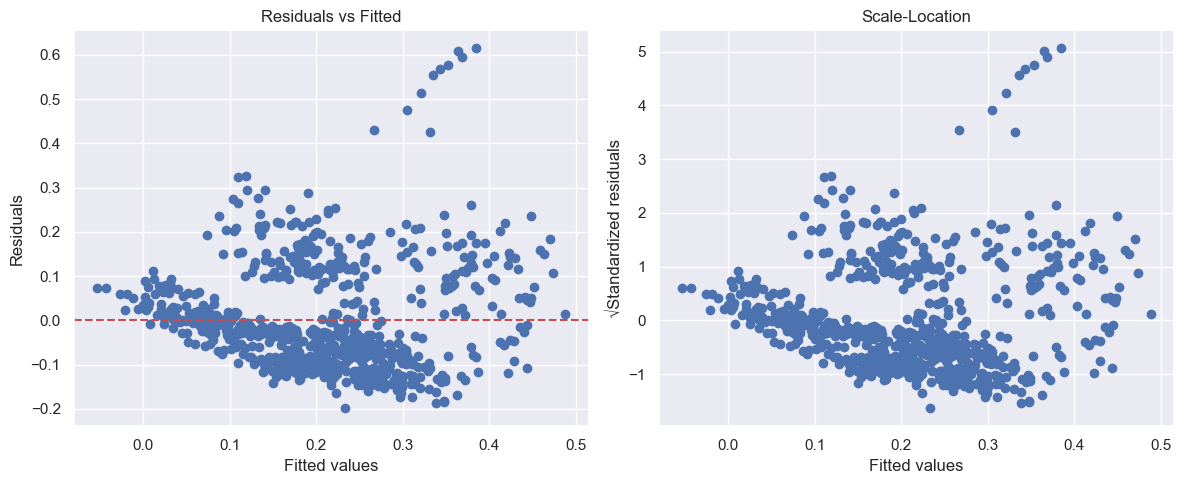

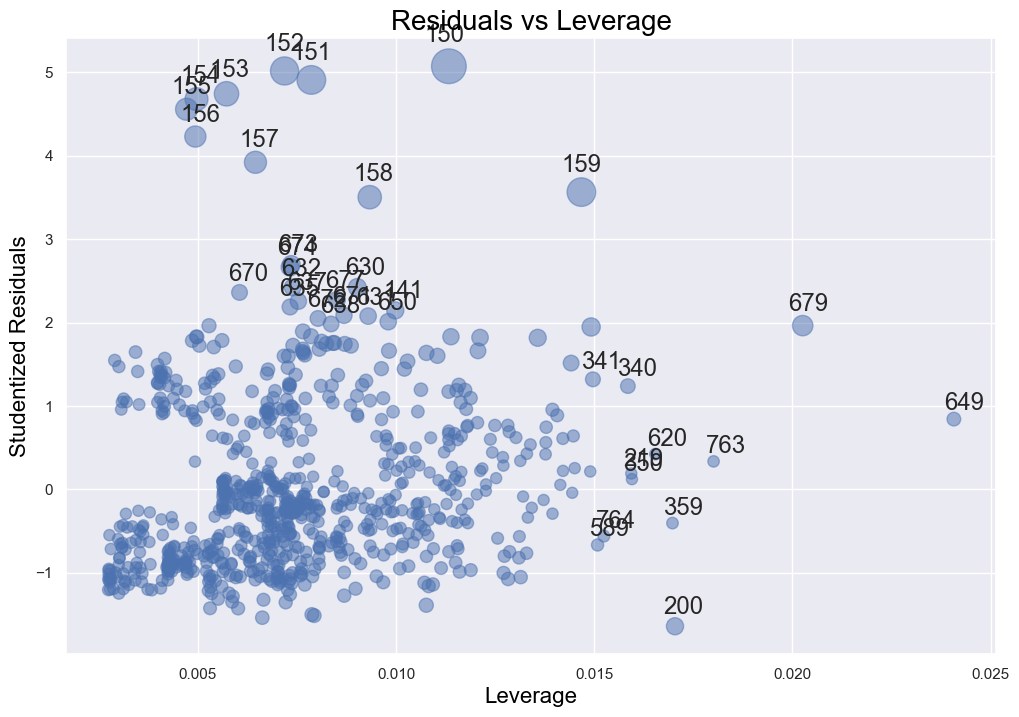

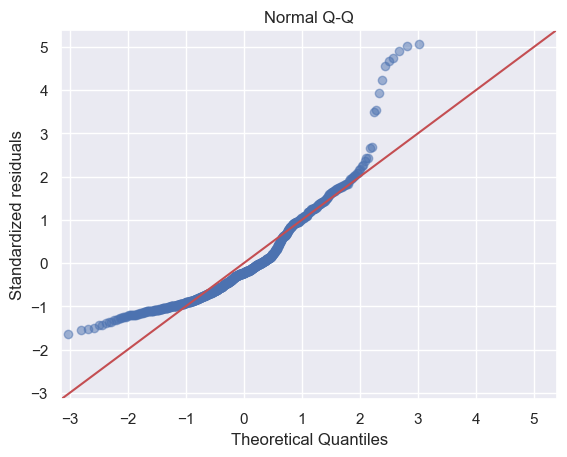

                                STEPS AIC                              
Selected Features: ['Mileage', 'Liter', 'Cruise', 'Sound', 'Leather']
AIC: -1095.9999909681912


In [13]:
base_research = LinearRegressionResearch(y=data[explore_column], x=data.drop(columns=explore_column))
base_research.info()
base_research.draw_plots()
linear_data = base_research.stepwise_selection(criteria='AIC')

In [14]:
display(linear_data)

,Price,Mileage,Liter,Cruise,Sound,Leather
0,0.139660,0.158716,0.340909,1.0,1.0,1.0
1,0.143329,0.176952,0.340909,1.0,1.0,0.0
2,0.122027,0.257976,0.340909,1.0,1.0,0.0
3,0.123928,0.320744,0.340909,1.0,0.0,0.0
4,0.123964,0.390375,0.340909,1.0,0.0,1.0
...,...,...,...,...,...,...
799,0.126667,0.318489,0.318182,1.0,0.0,0.0
800,0.121337,0.375671,0.318182,1.0,1.0,0.0
801,0.114176,0.403384,0.318182,1.0,1.0,0.0
802,0.104319,0.513018,0.318182,1.0,1.0,0.0


In [15]:
# Применяем преобразование Бокса-Кокса к зависимой переменной
y_transformed, _ = boxcox(data[explore_column] + 1e-6)  # + 1 чтобы не было 0-значений
linear_data_t = linear_data.copy()
linear_data_t[explore_column] = y_transformed
display(linear_data_t)

,Price,Mileage,Liter,Cruise,Sound,Leather
0,-1.536836,0.158716,0.340909,1.0,1.0,1.0
1,-1.521324,0.176952,0.340909,1.0,1.0,0.0
2,-1.615873,0.257976,0.340909,1.0,1.0,0.0
3,-1.606964,0.320744,0.340909,1.0,0.0,0.0
4,-1.606794,0.390375,0.340909,1.0,0.0,1.0
...,...,...,...,...,...,...
799,-1.594298,0.318489,0.318182,1.0,0.0,0.0
800,-1.619136,0.375671,0.318182,1.0,1.0,0.0
801,-1.653802,0.403384,0.318182,1.0,1.0,0.0
802,-1.704239,0.513018,0.318182,1.0,1.0,0.0


                                    Price                                     
Dep. Variable:                  Price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     153.6
Date:                Wed, 06 Dec 2023   Prob (F-statistic):          3.03e-114
Time:                        03:34:47   Log-Likelihood:                -309.10
No. Observations:                 804   AIC:                             630.2
Df Residuals:                     798   BIC:                             658.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8657      0.049    -38.312      0.0

,Variable,VIF,Tolerance
0,const,14.982602,0.066744
1,Mileage,1.002294,0.997711
2,Liter,1.188982,0.841056
3,Cruise,1.185921,0.843227
4,Sound,1.038791,0.962658
5,Leather,1.049419,0.952908


,const,Mileage,Liter,Cruise,Sound,Leather,F-statistic,Prob (F-statistic),df_denom,df_num
0,1.0,0.0,0.0,0.0,0.0,0.0,1467.772565,5.159779223175333e-183,798.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,41.376794,2.1618482264721385e-10,798.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,271.177253,1.1361529903513268e-52,798.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,145.344543,7.239267286588197e-31,798.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,11.348357,0.0007913670015104347,798.0,1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,24.889934,7.452827996489821e-07,798.0,1.0
6,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",2299.549792,0.0,798.0,6.0


,dfb_const,dfb_Mileage,dfb_Liter,dfb_Cruise,dfb_Sound,dfb_Leather,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.012903,0.047228,0.008843,-0.024848,-0.019698,-0.019451,0.000779,-0.936342,0.005305,-0.068380,-0.936269,-0.068374
1,-0.018815,0.021172,-0.000594,-0.008427,-0.016048,0.027987,0.000293,-0.463757,0.008112,-0.041941,-0.463528,-0.041920
2,-0.018300,0.017303,-0.001139,-0.010830,-0.021606,0.037297,0.000435,-0.616414,0.006826,-0.051104,-0.616175,-0.051084
3,-0.038374,0.012618,0.001509,-0.009925,0.031959,0.036566,0.000661,-0.764073,0.006743,-0.062957,-0.763873,-0.062941
4,-0.012493,0.002465,0.012932,-0.022185,0.058694,-0.035348,0.001011,-1.070233,0.005268,-0.077882,-1.070330,-0.077889
...,...,...,...,...,...,...,...,...,...,...,...,...
799,-0.034442,0.011537,0.003695,-0.009668,0.028332,0.031947,0.000517,-0.674098,0.006786,-0.055718,-0.673867,-0.055699
800,-0.005845,0.001081,0.000331,-0.007283,-0.014340,0.024347,0.000165,-0.403797,0.006043,-0.031486,-0.403585,-0.031469
801,-0.004979,-0.001538,0.000289,-0.008252,-0.016504,0.027926,0.000217,-0.462637,0.006047,-0.036085,-0.462410,-0.036068
802,0.001775,-0.012235,-0.000064,-0.007699,-0.016407,0.027398,0.000232,-0.451792,0.006765,-0.037287,-0.451567,-0.037268


,student_resid,unadj_p,bonferroni(p)
0,-0.936269,0.349418,1.0
1,-0.463528,0.643112,1.0
2,-0.616175,0.537955,1.0
3,-0.763873,0.445169,1.0
4,-1.070330,0.284795,1.0
...,...,...,...
799,-0.673867,0.500591,1.0
800,-0.403585,0.686626,1.0
801,-0.462410,0.643914,1.0
802,-0.451567,0.651704,1.0


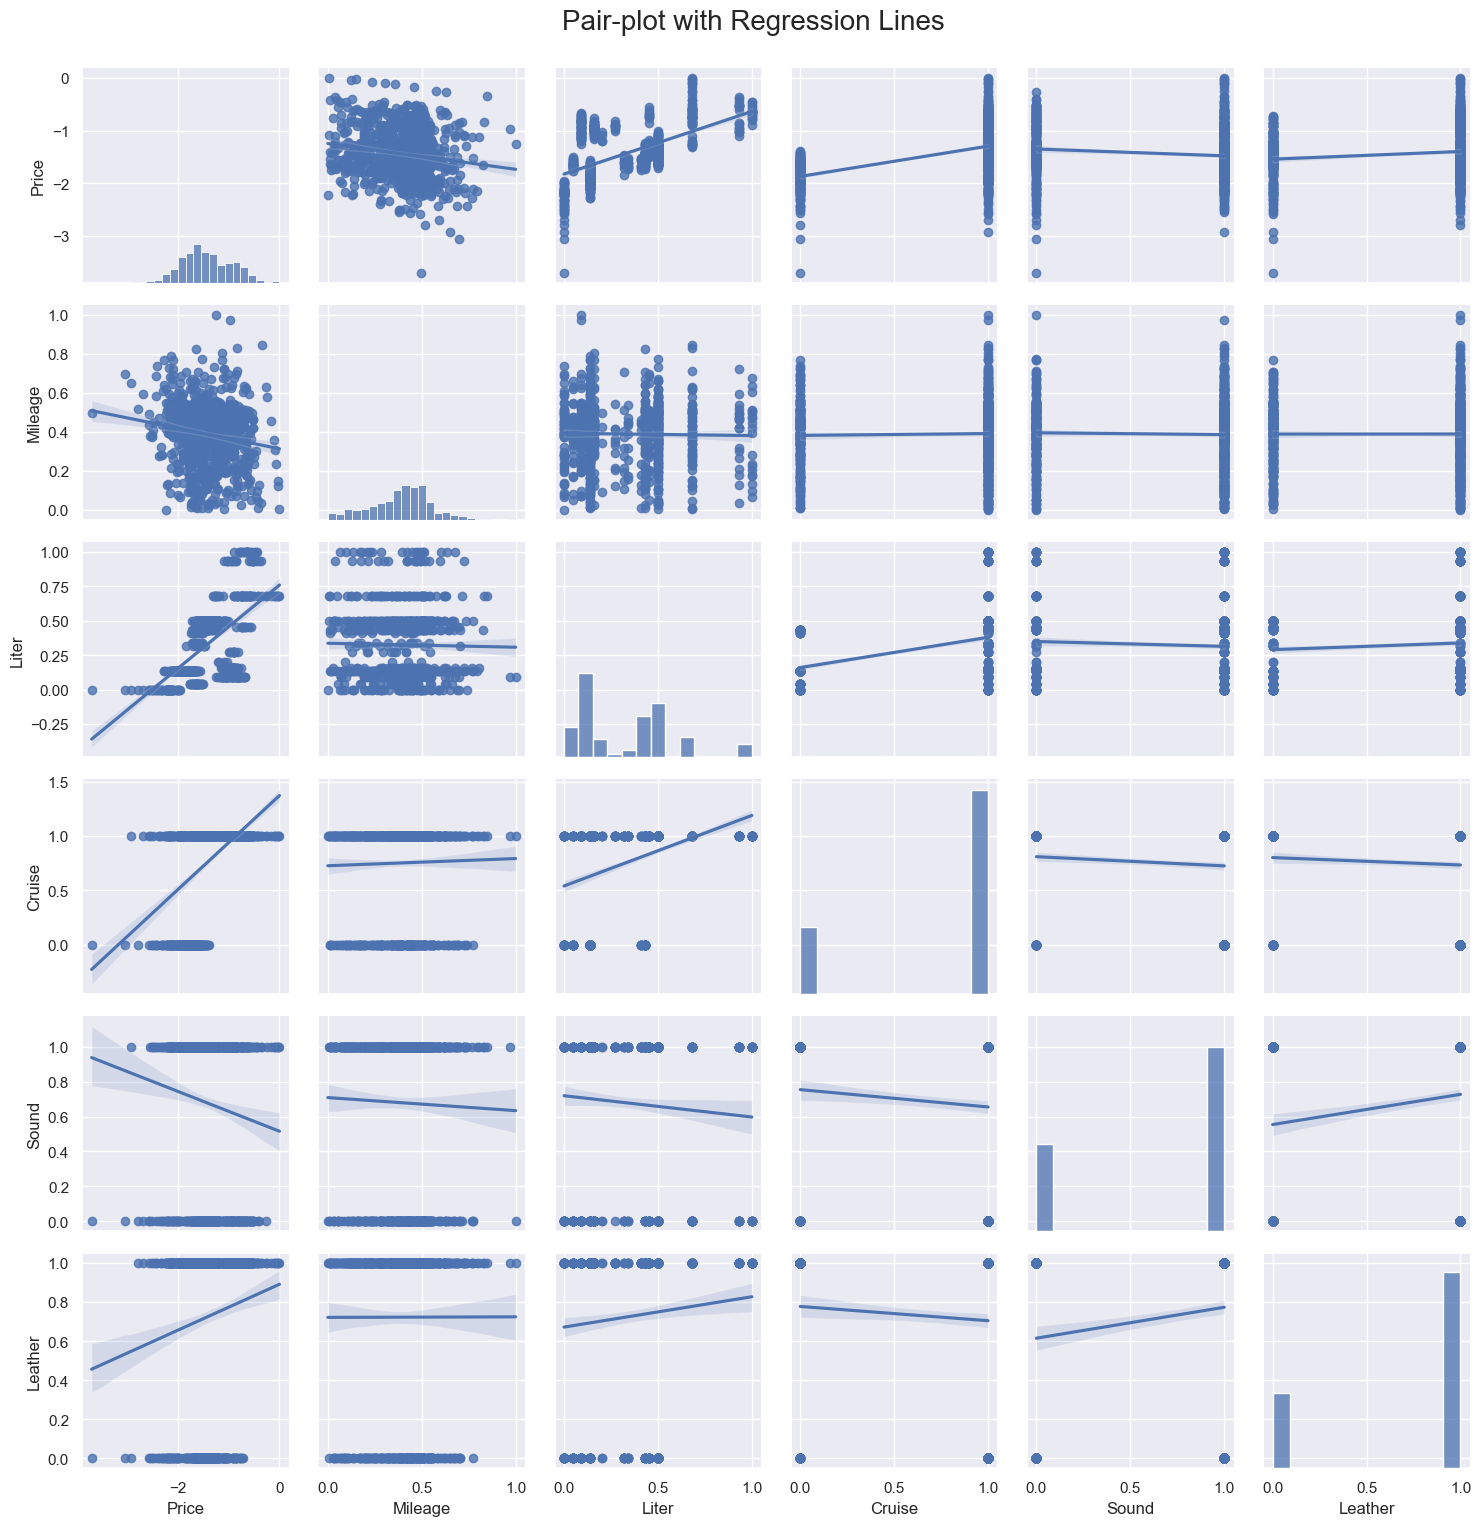

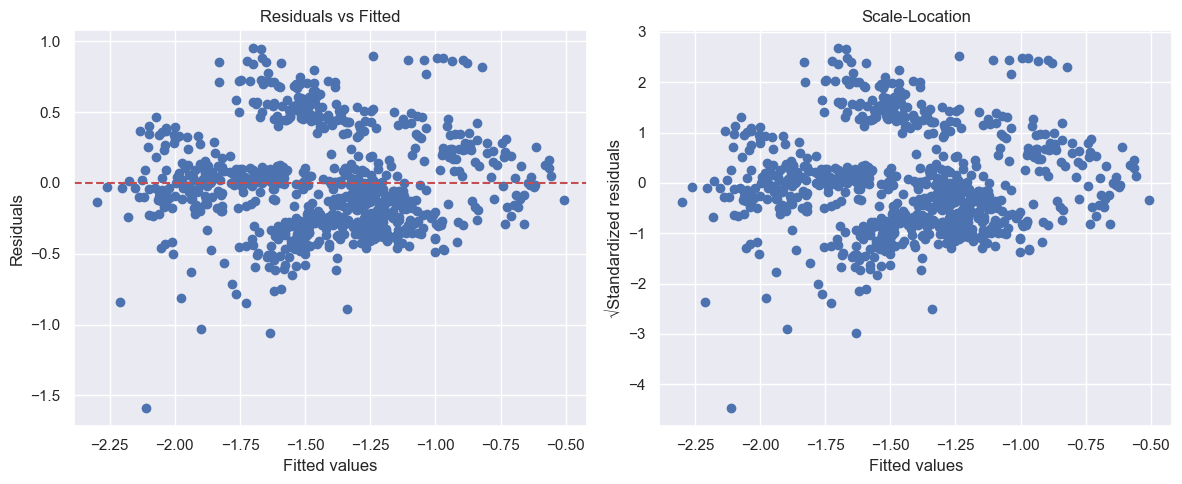

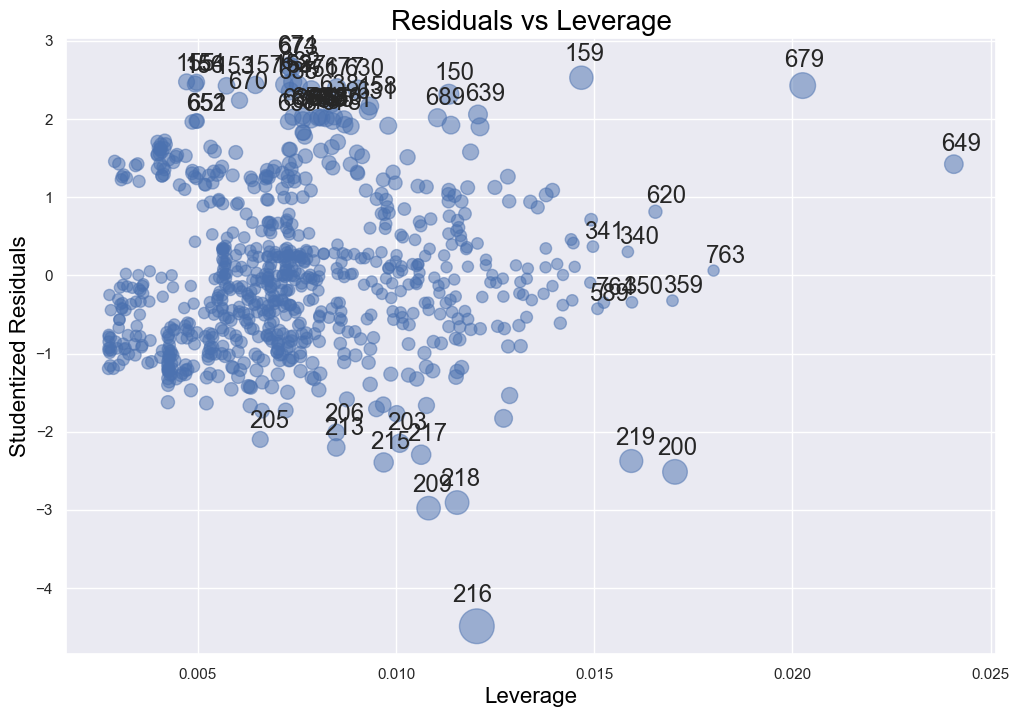

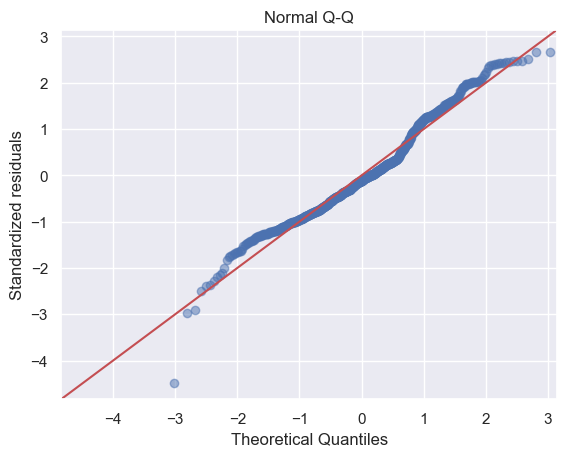

In [16]:
# Проводим анализ заново
enhanced_research = LinearRegressionResearch(y=linear_data_t[explore_column], 
                                             x=linear_data_t.drop(columns=explore_column))
enhanced_research.info()
enhanced_research.draw_plots()